# Problema a ser Resolvido:

Criar um modelo que prevê as vendas unitárias de milhares de itens vendidos em diferentes lojas Favorita. O conjunto de dados é composto de uma base de treinamento acessível de datas, lojas e informações de itens, promoções e unidades vendidas.


# Datasets Originais:

Os [dados de treinamento](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data) incluindo séries temporais dos recursos store_nbr, family e onpromotion, bem como as vendas-alvo.

1. Train.csv
  1. **store_nbr** identifica a loja onde os produtos são vendidos;
  1. **family** identifica o tipo de produto vendido;
  1. **sales** fornece o total de vendas de uma família de produtos em uma determinada loja em uma determinada data. Valores fracionários são possíveis, pois os produtos podem ser vendidos em unidades fracionárias (1,5 kg de queijo, por exemplo, em oposição a 1 saco de batatas fritas).
  1. **onpromotion** fornece o número total de itens em uma família de produtos que estavam sendo promovidos em uma loja em uma determinada data.
1. Stores.csv
  - Metadados de lojas,incluindo cidades, estado, tipo e _cluster_ - agrupamento de lojas similares;
1. Oil.csv
  - Preço do petróleio diariamente
1. Holidays_events.csv
  - Metadados de feriados e eventos


### Quantidade de dados totais:

* 3054348 linhas e 19 colunas

### Tipo de Problema:
* Regressão

### Métricas de Avaliação de Resultados

- **MAPE:** Mean Absolute Percentage Error
- **MSE:** Mean Squared Error
- **R2:** R2 Score:

### Classificadores Escolhidos:
1. Grandient Boosting;
2. Linear Regression;
3. Decision Tree:
  1. *Criterion = "squared_error"* (função para medição da qualidade da divisão dos dados);
4. Random Forest Regressor (Excluído do processo)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from google.colab import drive

drive.mount('/content/drive')
workfolder = '/content/drive/MyDrive'

Mounted at /content/drive


In [ ]:
holidays_df = pd.read_csv(f"{workfolder}/MachineLearning/StoreSales/holidays_events.csv")
oil_df = pd.read_csv(f"{workfolder}/MachineLearning/StoreSales/oil.csv")
stores_df = pd.read_csv(f"{workfolder}/MachineLearning/StoreSales/stores.csv")
transactions_df = pd.read_csv(f"{workfolder}/MachineLearning/StoreSales/transactions.csv")
train_df = pd.read_csv(f"{workfolder}/MachineLearning/StoreSales/train.csv")
test_df = pd.read_csv(f"{workfolder}/MachineLearning/StoreSales/train.csv")

## Conhecendo os *datasets* e suas *features*

In [ ]:
print(holidays_df.shape)
print(holidays_df.info())
holidays_df.head()

(350, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
print(oil_df.shape)
print(oil_df.info())
oil_df.head()

(1218, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
print(stores_df.shape)
print(stores_df.info())
stores_df.head()

(54, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
print(transactions_df.shape)
print(transactions_df.info())
transactions_df.head()

(83488, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
None


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
print(train_df.shape)
print(train_df.info())
train_df.head()

(3000888, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
print(test_df.shape)
print(test_df.info())
test_df.head()

(3000888, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


### Aplicando merge para os dados de treino e os dados de teste

In [ ]:
merged_train_df = train_df \
    .merge(right=stores_df, on="store_nbr") \
    .merge(right=oil_df, how="left", on="date") \
    .merge(right=holidays_df, how="left", on="date") \
    .merge(right=transactions_df, how="left", on=["store_nbr", "date"])

merged_test_df = test_df \
    .merge(right=stores_df, on="store_nbr") \
    .merge(right=oil_df, how="left", on="date") \
    .merge(right=holidays_df, how="left", on="date") \
    .merge(right=transactions_df, how="left", on=["store_nbr", "date"])

In [ ]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   city          object 
 7   state         object 
 8   type_x        object 
 9   cluster       int64  
 10  dcoilwtico    float64
 11  type_y        object 
 12  locale        object 
 13  locale_name   object 
 14  description   object 
 15  transferred   object 
 16  transactions  float64
dtypes: float64(3), int64(4), object(10)
memory usage: 419.5+ MB


### Transformando a coluna *date* para o tipo *datetime* e criando colunas para mês e ano

In [ ]:
merged_train_df["date"] = pd.to_datetime(merged_train_df["date"])
merged_train_df["month"] = merged_train_df["date"].dt.month
merged_train_df["year"] = merged_train_df["date"].dt.year

merged_test_df["date"] = pd.to_datetime(merged_test_df["date"])
merged_test_df["month"] = merged_test_df["date"].dt.month
merged_test_df["year"] = merged_test_df["date"].dt.year

# merged_train_df.set_index("date", inplace=True)

### Verificando a quantidade de dados nulos no *dateset*

In [ ]:
merged_train_df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type_x                0
cluster               0
dcoilwtico       955152
type_y          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
transactions     249117
month                 0
year                  0
dtype: int64

In [ ]:
merged_train_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions,month,year
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,8,2017
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,8,2017
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,8,2017
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,8,2017


### Analisando as colunas que contêm dados nulos

Text(0, 0.5, 'Features')

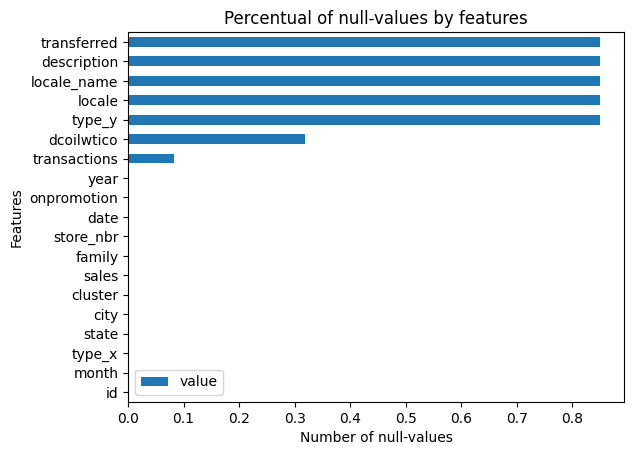

In [ ]:
columns_null_values = merged_train_df.isnull().sum() / len(train_df)
columns_null_values_df = columns_null_values.to_frame().rename(columns={0: "value"})
columns_null_values_df.sort_values("value", ascending=True).plot(kind="barh")
plt.title("Percentual of null-values by features")
plt.xlabel("Number of null-values")
plt.ylabel("Features")

In [ ]:
columns_null_values

id              0.000000
date            0.000000
store_nbr       0.000000
family          0.000000
sales           0.000000
onpromotion     0.000000
city            0.000000
state           0.000000
type_x          0.000000
cluster         0.000000
dcoilwtico      0.318290
type_y          0.850356
locale          0.850356
locale_name     0.850356
description     0.850356
transferred     0.850356
transactions    0.083014
month           0.000000
year            0.000000
dtype: float64

### Apresentação gráfica da correlação entre as colunas e suas respectivas informações

<Axes: >

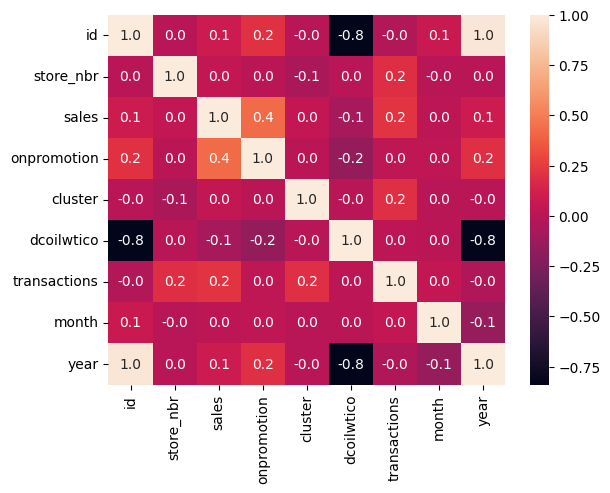

In [ ]:
sns.heatmap(merged_train_df.corr(numeric_only=True), annot=True, fmt=".1f")

In [ ]:
merged_train_df.describe()

,id,store_nbr,sales,onpromotion,cluster,dcoilwtico,transactions,month,year
count,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,2.099196e+06,2.805231e+06,3.054348e+06,3.054348e+06
mean,1.504277e+06,2.750000e+01,3.590209e+02,2.617480e+00,8.481481e+00,6.801587e+01,1.697071e+03,6.222870e+00,2.014842e+03
std,8.662610e+05,1.558579e+01,1.107286e+03,1.225494e+01,4.649735e+00,2.569134e+01,9.668317e+02,3.374251e+00,1.345607e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.619000e+01,5.000000e+00,1.000000e+00,2.013000e+03
25%,7.546768e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00,4.641000e+01,1.046000e+03,3.000000e+00,2.014000e+03
50%,1.507572e+06,2.750000e+01,1.100000e+01,0.000000e+00,8.500000e+00,5.343000e+01,1.395000e+03,6.000000e+00,2.015000e+03
75%,2.255120e+06,4.100000e+01,1.960110e+02,0.000000e+00,1.300000e+01,9.581000e+01,2.081000e+03,9.000000e+00,2.016000e+03
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.700000e+01,1.106200e+02,8.359000e+03,1.200000e+01,2.017000e+03


In [ ]:
merged_train_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions,month,year
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,NaN,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,8,2017
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,8,2017
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,8,2017
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,8,2017


### Análise da quantidade de vendas por cada estado e cidade

<Axes: xlabel='state'>

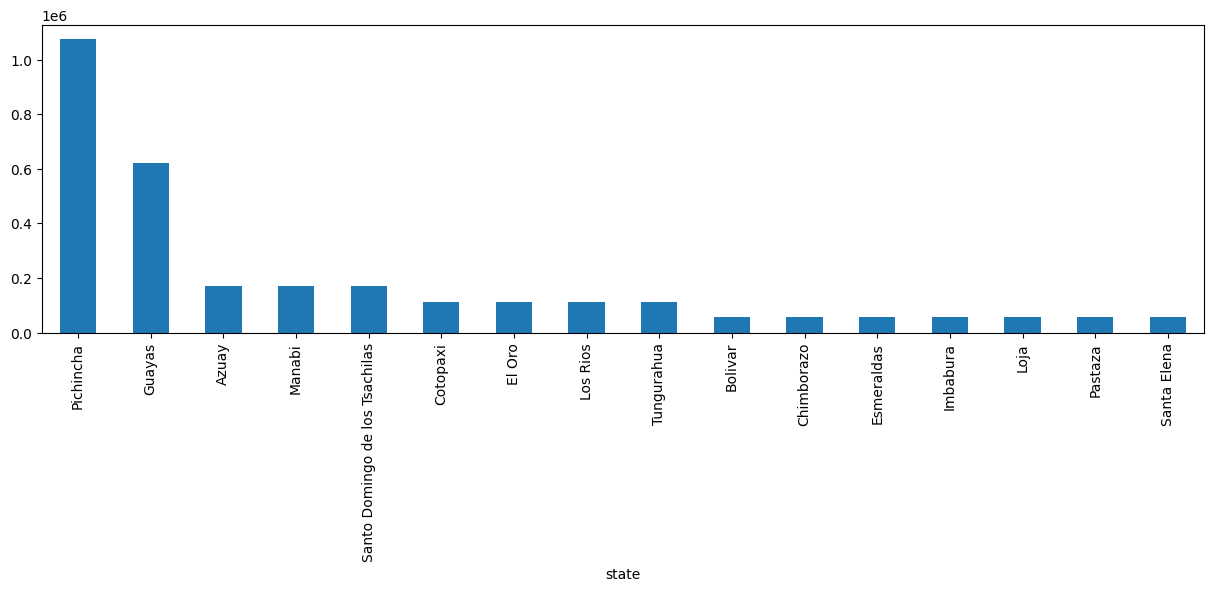

In [ ]:
merged_train_df.groupby("state")["sales"].count().sort_values(ascending=False) \
               .plot(kind="bar", figsize=(15, 4))

<Axes: xlabel='city'>

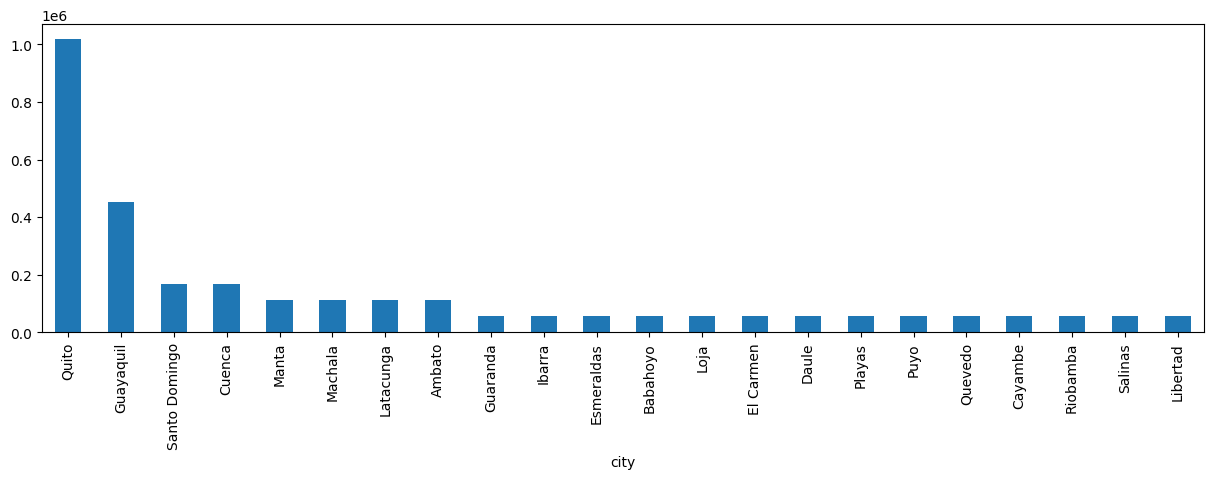

In [ ]:
merged_train_df.groupby("city")["sales"].count().sort_values(ascending=False) \
               .plot(kind="bar", figsize=(15, 4))

### Identificação dos tipos de venderam mais em relação a todas as vendas registradas

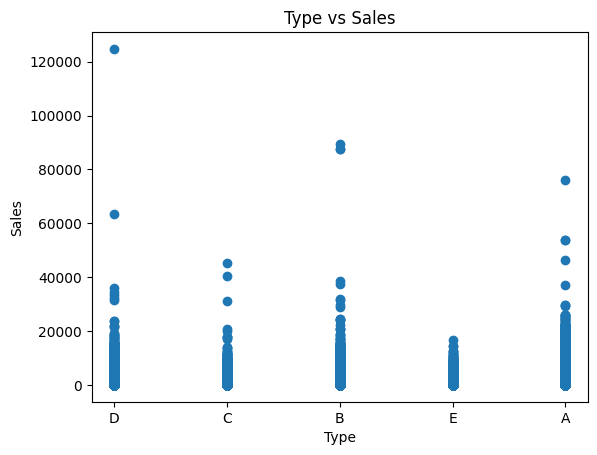

In [ ]:
plt.scatter(merged_train_df["type_x"], merged_train_df["sales"])
plt.title("Type vs Sales")
plt.xlabel("Type")
plt.ylabel("Sales")
plt.show()

### Análise da classe de produtos que mais venderam em relação as vendas totais

[]

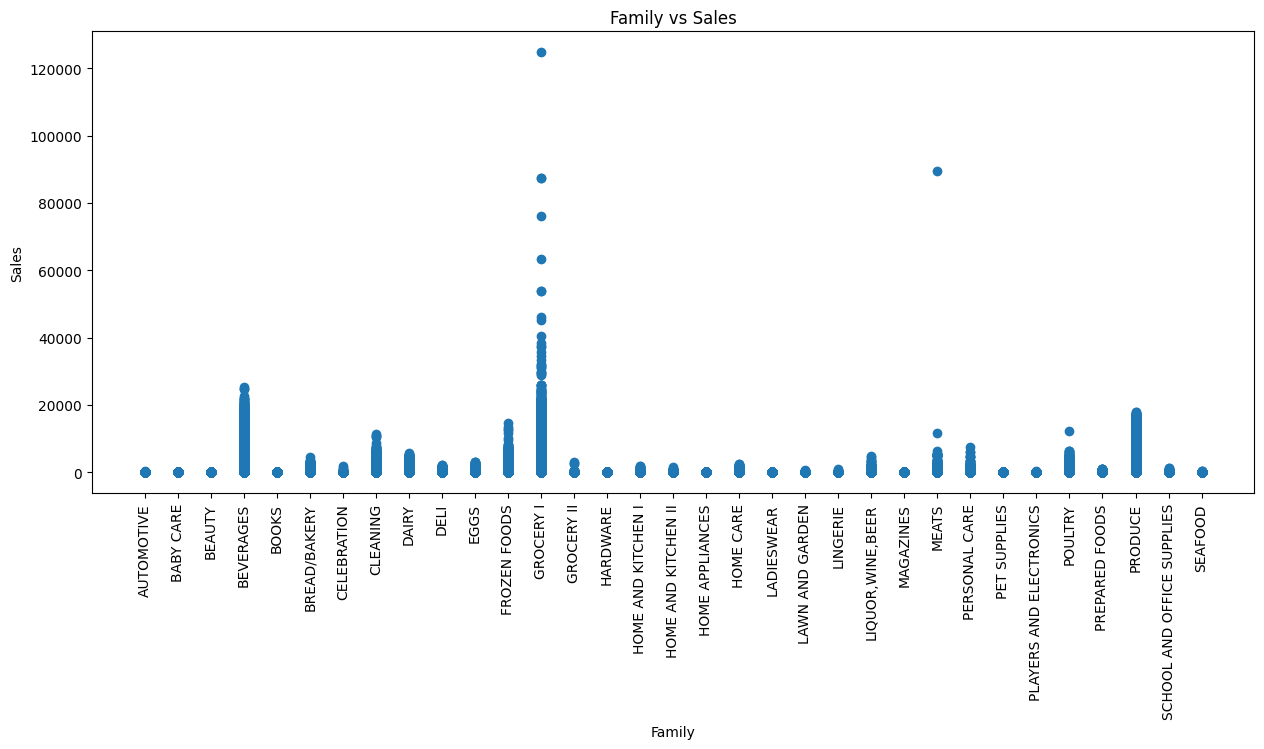

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(merged_train_df["family"], merged_train_df["sales"])
plt.title("Family vs Sales")
plt.xlabel("Family")
plt.xticks(rotation=90)
plt.ylabel("Sales")
plt.plot()

### Relação entre a quantidade de vendas e o valor de promoção aplicada sobre elas

[]

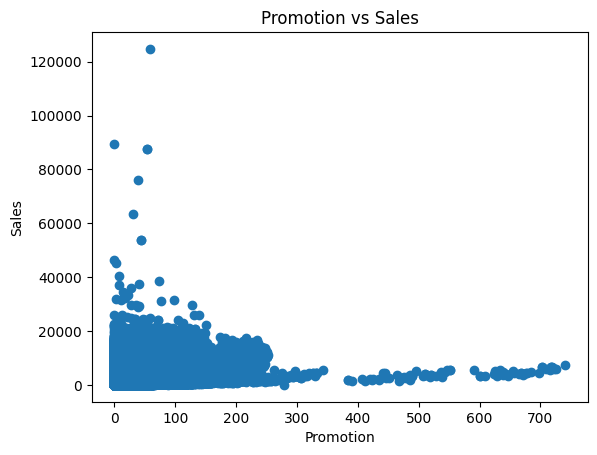

In [ ]:
plt.scatter(merged_train_df["onpromotion"], merged_train_df["sales"])
plt.title("Promotion vs Sales")
plt.xlabel("Promotion")
plt.ylabel("Sales")
plt.plot()

### Gráfico do comportamento da quantidade de vendas durante o intervalo de anos 2013 a 2017

year
2013    Axes(0.125,0.2;0.775x0.68)
2014    Axes(0.125,0.2;0.775x0.68)
2015    Axes(0.125,0.2;0.775x0.68)
2016    Axes(0.125,0.2;0.775x0.68)
2017    Axes(0.125,0.2;0.775x0.68)
Name: sales, dtype: object

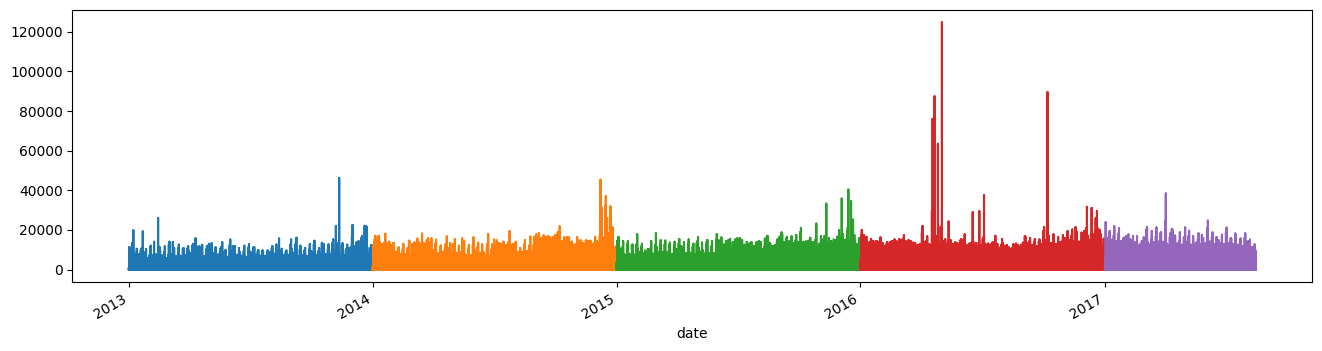

In [ ]:
merged_train_df_date_ind = merged_train_df.copy()
merged_train_df_date_ind.set_index("date", inplace=True)
merged_train_df_date_ind.groupby("year")["sales"].plot(kind="line", figsize=(16,4))

### Gráfico de comportamento das vendas e de promoções durante um intervalo de tempo

- O método *rolling()* trata-se da implementação de *window calculation*, isto é, funções matemáticas cuja aplicação em um *dataset* permite enfatizar certos *data points* dentro de uma janela (intervalo) específico; sendo assim bastante utilizado em análise de *time series*.

<Axes: xlabel='date'>

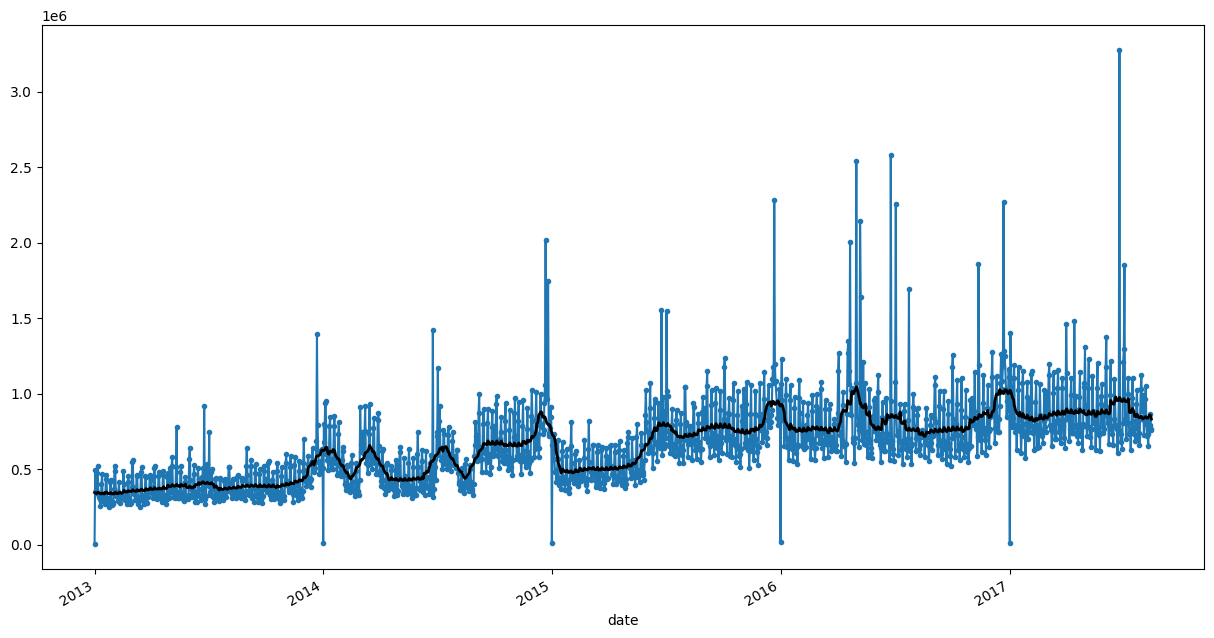

In [ ]:
merged_train_df_date_ind.groupby("date")["sales"].sum().plot(marker=".", figsize=(15, 6))
merged_train_df_date_ind.groupby("date")["sales"].sum().rolling(window=30, min_periods=7, center=True).mean().plot(lw=2, color="black", figsize=(15,8))

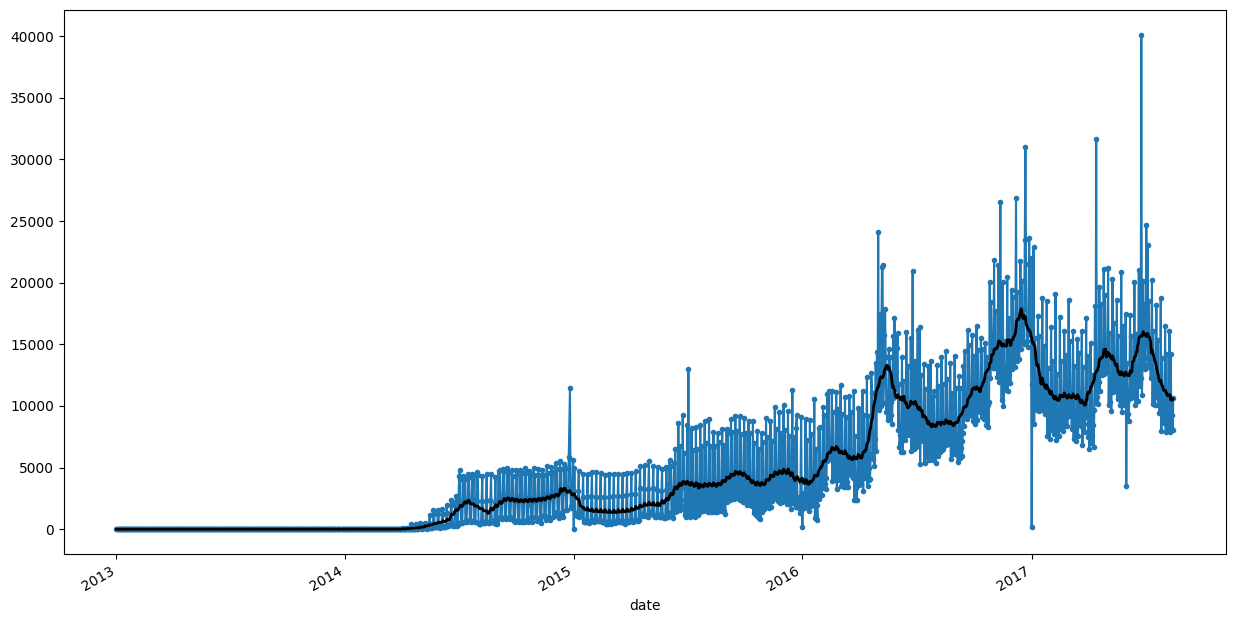

In [ ]:
merged_train_df_date_ind.groupby("date")["onpromotion"].sum().plot(marker=".", figsize = (15,8));
merged_train_df_date_ind.groupby("date")["onpromotion"].sum().rolling(window=30, min_periods=7, center=True).mean().plot(lw=2,color="black", figsize = (15,8));

In [ ]:
merged_train_df_sum = merged_train_df.groupby("date")[["sales", "onpromotion"]].sum().reset_index()
merged_test_df_sum = merged_test_df.groupby("date")[["sales", "onpromotion"]].sum().reset_index()

print(merged_train_df_sum)
print("Autocorrelation:", merged_train_df_sum["sales"].autocorr())

           date          sales  onpromotion
0    2013-01-01    2511.618999            0
1    2013-01-02  496092.417944            0
2    2013-01-03  361461.231124            0
3    2013-01-04  354459.677093            0
4    2013-01-05  477350.121229            0
...         ...            ...          ...
1679 2017-08-11  826373.722022        14179
1680 2017-08-12  792630.535079         8312
1681 2017-08-13  865639.677471         9283
1682 2017-08-14  760922.406081         8043
1683 2017-08-15  762661.935939        10605

[1684 rows x 3 columns]
Autocorrelation: 0.6284657637814299


### Gráficos de autocorrelação

Os gráficos de autocorrelação auxiliam na identificação de dados de atraso (*lag values*) e possíveis componentes de média móvel.
- Caso o valor de autocorrelação seja próximo de 1 ou -1, logo a autocorrelação seja positiva ou negativa
- Caso seja próxima de 0, significa uma fraca ou nenhuma autocorrelação;

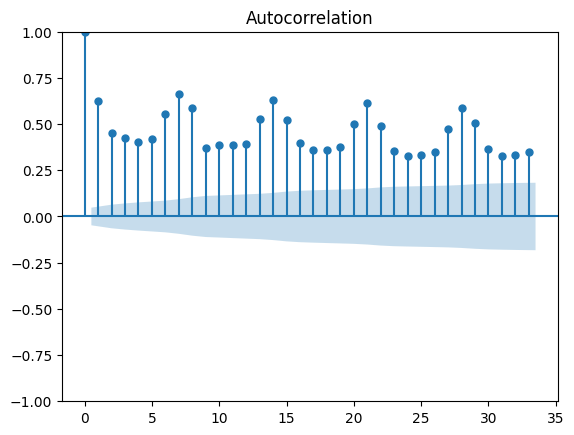

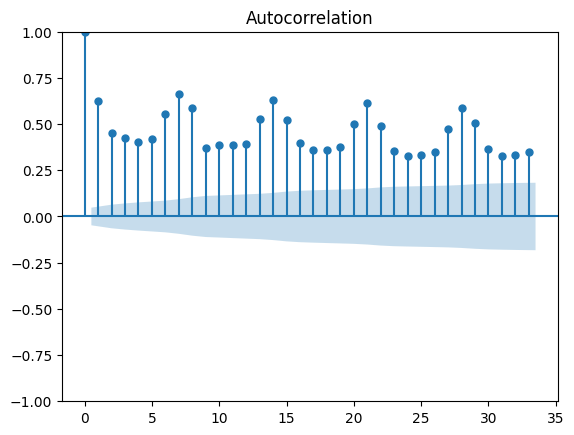

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(merged_train_df_sum["sales"])

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
class FeatureImputer(BaseEstimator, TransformerMixin):
  def __init__(self, strategy="constant", fill_value=None, columns=None):
    self.strategy = strategy
    self.fill_value = fill_value
    self.columns = columns

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    imputer = SimpleImputer(strategy=self.strategy)

    for col in self.columns:
      X[col] = imputer.fit_transform(X[[col]])
    return X

class FeatureEnconder(BaseEstimator, TransformerMixin):
  def __init__(self, typeEn=None, columns=None):
    self.typeEn = typeEn,
    self.columns = columns,
    self.enconders = {
      "onehotencoder": OneHotEncoder(handle_unknown='ignore'),
      "ordinalencoder": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    }

  def fit(self, X, y=None):
    return self

  def transform(self, X):

    encoder = None
    if self.typeEn == "onehotencoder":
      encoder = OneHotEncoder(handle_unknown='ignore')
    else:
      encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

    for col in self.columns:
      X[col] = encoder.fit_transform(X[[col]]).toarray()
    return X

class FeatureOrdinalEnconder(BaseEstimator, TransformerMixin):
  def __init__(self, columns=None):
    self.columns = columns,

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    encoder = OneHotEncoder()
    cols_to_transform = X.columns

    if self.columns:
      cols_to_transform = self.columns
    for col in cols_to_transform:
      print("Col: ", X[[col[0]]])
      X[col] = encoder.fit_transform(X[[col]])
    return X


In [ ]:
none_pipe = Pipeline([
    ('imputer', FeatureImputer(strategy='constant', fill_value = 'Other', columns=['type_y', 'locale', 'type_x', 'transferred'])),
    ('encoder', FeatureEnconder(typeEn="onehotencoder", columns=['type_y', 'locale', 'type_x', 'transferred']))
]) ## holiday_type, locale, transferred, city_type

cat_pipe = Pipeline([
    ('imputer', FeatureImputer(strategy='most_frequent', fill_value='missing', columns=['family'])),
    ('encoder', FeatureEnconder(typeEn="ordinalencoder", columns=['family']))
]) ## city, family

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value = -1)),
    ('scaler', StandardScaler())
]) ## dcoilwtico

In [ ]:
class DropColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, by=1, columns=None):
        self.by = by
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        cols_to_transform = X.columns
        if self.columns:
            cols_to_transform = self.columns
        X = X.drop(cols_to_transform, axis = 1)
        return X

class BoolTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, by=1, columns=None):
        self.by = by
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        cols_to_transform = X.columns
        if self.columns:
            cols_to_transform = self.columns
        for col in cols_to_transform:
            X[col] = X[col].apply(lambda x: str(x))
        return X


In [ ]:
pipe = Pipeline(
  steps=[
    ("drop columns", DropColumnTransformer(columns=['description','locale_name', 'id', 'city'])),
    ("bool columns", BoolTransformer(columns=['transferred'])),
    ('imputerFirst', FeatureImputer(strategy='constant', fill_value = 'Other', columns=['type_y', 'locale', 'type_x', 'transferred'])),
    ('imputerSecond', FeatureImputer(strategy='most_frequent', fill_value='missing', columns=['family'])),
    ('imputerThird', FeatureImputer(strategy='constant', fill_value = -1, columns=['store_nbr', 'onpromotion', 'cluster', 'transactions', 'dcoilwtico']))
  ]
)


In [ ]:
train_df_pipe = pipe.fit_transform(merged_train_df)

In [ ]:
encoder = OrdinalEncoder()
one_hot_encoder = OneHotEncoder()
scaler = StandardScaler()

locale_dummies = pd.get_dummies(train_df_pipe['locale'])
type_x_dummies = pd.get_dummies(train_df_pipe["type_x"])
type_y_dummies = pd.get_dummies(train_df_pipe["type_y"])
transferred_dummies = pd.get_dummies(train_df_pipe["transferred"])

train_df_pipe["family"] = encoder.fit_transform(train_df_pipe[["family"]])

train_df_pipe["store_nbr"] = scaler.fit_transform(train_df_pipe[['store_nbr']])
train_df_pipe["onpromotion"] = scaler.fit_transform(train_df_pipe[['onpromotion']])
train_df_pipe["cluster"] = scaler.fit_transform(train_df_pipe[['cluster']])
train_df_pipe["transactions"] = scaler.fit_transform(train_df_pipe[['transactions']])

train_df_pipe = pd.concat([train_df_pipe, transferred_dummies, locale_dummies, type_x_dummies, type_y_dummies], axis=1)
train_df_pipe.drop(["nan", "locale", "type_x", "type_y", "transferred", "state"], axis=1, inplace=True)

In [ ]:
train_df_pipe

,date,store_nbr,family,sales,onpromotion,cluster,dcoilwtico,transactions,month,year,...,C,D,E,Additional,Bridge,Event,Holiday,Transfer,Work Day,missing_value
0,2013-01-01,-1.700267,0.0,0.000,-0.213586,0.971780,0.00,-1.503816,1,2013,...,0,1,0,0,0,0,1,0,0,0
1,2013-01-01,-1.700267,1.0,0.000,-0.213586,0.971780,0.00,-1.503816,1,2013,...,0,1,0,0,0,0,1,0,0,0
2,2013-01-01,-1.700267,2.0,0.000,-0.213586,0.971780,0.00,-1.503816,1,2013,...,0,1,0,0,0,0,1,0,0,0
3,2013-01-01,-1.700267,3.0,0.000,-0.213586,0.971780,0.00,-1.503816,1,2013,...,0,1,0,0,0,0,1,0,0,0
4,2013-01-01,-1.700267,4.0,0.000,-0.213586,0.971780,0.00,-1.503816,1,2013,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,-1.186979,28.0,438.133,-0.213586,-0.533682,47.57,0.575362,8,2017,...,0,0,0,0,0,0,1,0,0,0
3054344,2017-08-15,-1.186979,29.0,154.553,-0.131986,-0.533682,47.57,0.575362,8,2017,...,0,0,0,0,0,0,1,0,0,0
3054345,2017-08-15,-1.186979,30.0,2419.729,11.863180,-0.533682,47.57,0.575362,8,2017,...,0,0,0,0,0,0,1,0,0,0
3054346,2017-08-15,-1.186979,31.0,121.000,0.439212,-0.533682,47.57,0.575362,8,2017,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
X = train_df_pipe.drop(['sales', 'date'], axis =1)
y = train_df_pipe['sales']

In [ ]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, confusion_matrix

In [ ]:
all_r2_score_values = []
all_classifiers = []

In [ ]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

In [ ]:
all_r2_score_values.append(reg.score(X_test, y_test))
all_classifiers.append("Gradient Boosting")

In [ ]:
y_pred = reg.predict(X_test)

MAPE: 1.3912010167341136e+17
MSE: 308914.0497736534
R2: 0.7563242092385326


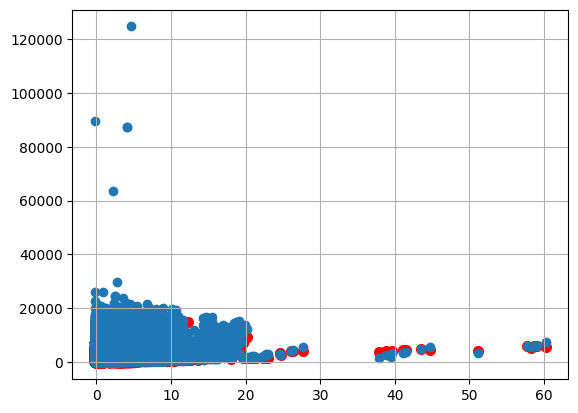

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_val = r2_score(y_test, y_pred)

print("MAPE:", mape)
print("MSE:", mse)
print("R2:", r2_val)


plt.scatter(X_test["onpromotion"], y_pred, linewidth=2, c='r')
plt.scatter(X_test["onpromotion"], y_test)
plt.grid()

### Modelagem de relacionamento entre variáveis a partir da Regressão Linear

In [ ]:
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

In [ ]:
all_r2_score_values.append(linear_reg.score(X_test, y_test))
all_classifiers.append("Linear Regression")

In [ ]:
y_pred = linear_reg.predict(X_test)

MAPE: 3.193632027508629e+17
MSE: 978090.6764439363
R2: 0.2284681800859225


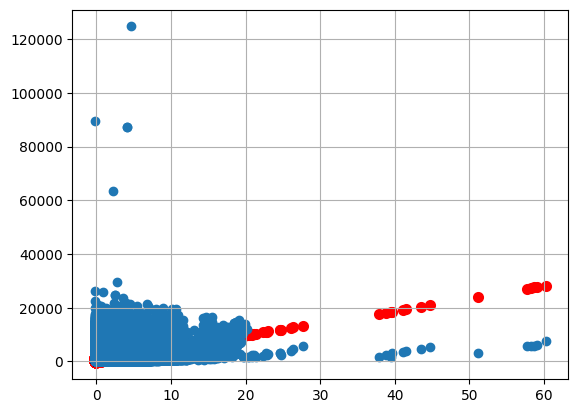

In [ ]:
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


plt.scatter(X_test["onpromotion"], y_pred, linewidth=2, c='r')
plt.scatter(X_test["onpromotion"], y_test)
plt.grid()

### Modelagem de relacionamento entre variáveis a partir da Decision Tree

In [ ]:
decision_tree_reg = DecisionTreeRegressor(criterion="squared_error")

decision_tree_reg.fit(X_train, y_train)

In [ ]:
all_r2_score_values.append(decision_tree_reg.score(X_test, y_test))
all_classifiers.append("Decision Tree")

In [ ]:
y_pred = decision_tree_reg.predict(X_test)

MAPE: 1629227667334974.8
MSE: 149313.2378671974
R2: 0.882219596890774


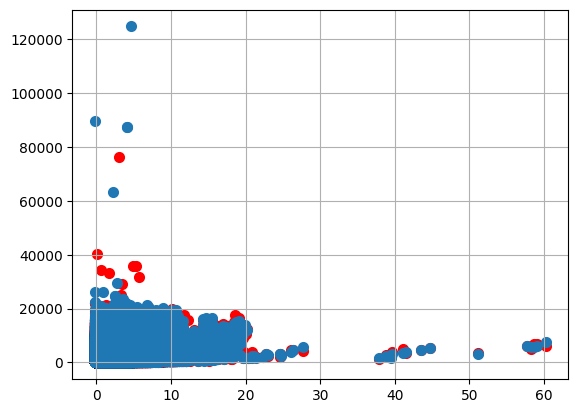

In [ ]:
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

plt.scatter(X_test["onpromotion"], y_pred, linewidth=2, c='r')
plt.scatter(X_test["onpromotion"], y_test, linewidth=2)
plt.grid()

Text(0.5, 1.0, 'Classificadores x R2 Score')

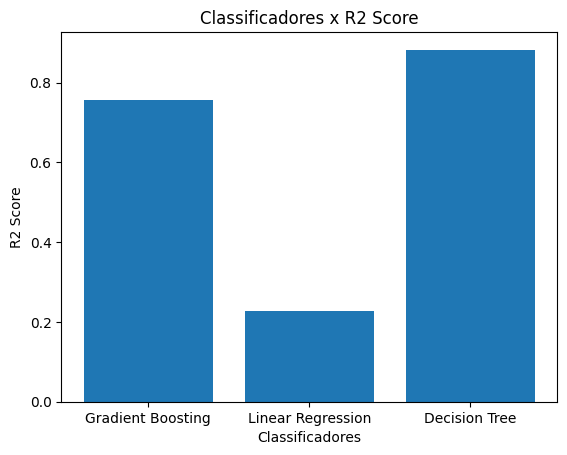

In [ ]:
plt.bar(all_classifiers, all_r2_score_values)
plt.xlabel("Classificadores")
plt.ylabel("R2 Score")
plt.title("Classificadores x R2 Score")

### Conclusões:
- Dificuldades:
  - Escolha dos classificadores para a solução do problema;
  - Preparação e limpeza dos dados de maneira a aprimorar os classificadores para a solução do problema;
- Aprendizados:
  - Estudo de novos classficadores (ARIMA, Gradient Boosting, Random Forest Regressor);
  - Melhor compreensão do processo de limpeza de dados;
  - Estudo de métricas de avaliação para modelos de regressão.
- Possíveis Melhorias:
  - Testar outros modelos de regressão;
  - Diversificar hiper-parâmetros dos modelos testados;
